In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

from milligrad import Tensor, Module, GD, topological_sort

from matplotlib import pyplot as plt

In [2]:
class MLP(Module):
    def __init__(self):
        self.w1 = Tensor.xavier(3, 20)
        self.w2 = Tensor.xavier(20, 2)
        self.b1 = Tensor.randn(20)
        self.b2 = Tensor.randn(2)
        
    def __call__(self, x):
        x = (x @ self.w1 + self.b1).relu()
        return (x @ self.w2 + self.b2).tanh()
    
    def parameters(self) -> list[Tensor]:
        return [self.w1, self.w2, self.b1, self.b2]

In [3]:


b = Tensor.randn(3, name="bias")
w = Tensor.randn(2, 3, name="weight")
x = Tensor.randn(5, 2, name="input")
y = (x @ w + b).relu()

# operations are recorded to perform backpropagation
# the order below is the order in which we bacpropagate
sorted_tensors = reversed(topological_sort(y))
[x.name for x in sorted_tensors if x.name] # "" is falsy

['relu', '+', '@', 'input', 'weight', 'bias']

In [8]:
from milligrad import Adam

x = Tensor.randn(20, 3)
y = Tensor.ones(20, 2)

model = MLP()
optim = Adam(model.parameters(), lr=1e-3)

losses = []
for i in range(1000):
    y_hat = model(x)
    loss = ((y - y_hat)**2).sum().sum()
    
    optim.zero_grad()
    loss.backward()
    optim.step()
        
    losses.append(loss.data)

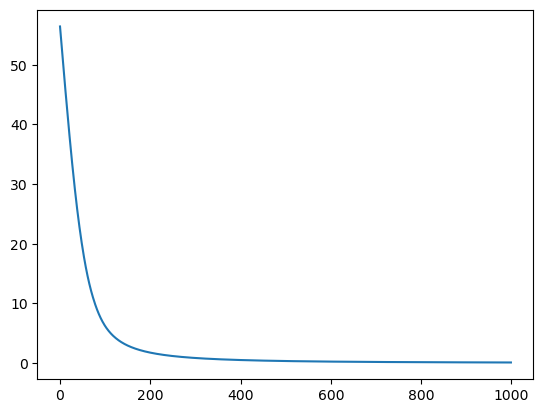

In [9]:
plt.plot(losses)

In [10]:
y_hat

array([[0.9644794 , 0.9857492 ],
       [0.9514314 , 0.95573248],
       [0.95326087, 0.97082246],
       [0.9588915 , 0.94165958],
       [0.93058151, 0.92026478],
       [0.93409751, 0.93265586],
       [0.957065  , 0.96752719],
       [0.93488265, 0.93101277],
       [0.98016925, 0.96330335],
       [0.9632403 , 0.95081389],
       [0.98048098, 0.97345698],
       [0.93555997, 0.94418188],
       [0.97393787, 0.97484938],
       [0.9523485 , 0.98361276],
       [0.95794976, 0.97265258],
       [0.96438646, 0.95057091],
       [0.99089739, 0.97824751],
       [0.96386572, 0.95909515],
       [0.95211787, 0.95948207],
       [0.92352815, 0.91861745]])

In [7]:
# example of using no_grad
with Tensor.no_grad():
    y_hat = model(x)
    y_hat.backward()

AssertionError: No gradient tracking when in no_grad mode